In [1]:
import re
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import emoji
import itertools 
from collections import Counter
import warnings
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
def rawToDf(file, key):
    '''Converts raw .txt file into a Data Frame'''
    
    split_formats = {
        '12hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s',
        '24hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s',
        'custom' : ''
    }
    datetime_formats = {
        '12hr' : '%d/%m/%Y, %I:%M %p - ',
        '24hr' : '%d/%m/%Y, %H:%M - ',
        'custom': ''
    }
    
    with open(file, 'r', encoding='utf-8') as raw_data:
        # print(raw_data.read())
        raw_string = ' '.join(raw_data.read().split('\n')) # converting the list split by newline char. as one whole string as there can be multi-line messages
        user_msg = re.split(split_formats[key], raw_string) [1:] # splits at all the date-time pattern, resulting in list of all the messages with user names
        date_time = re.findall(split_formats[key], raw_string) # finds all the date-time patterns
        
        df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg}) # exporting it to a df
        
    # converting date-time pattern which is of type String to type datetime,
    # format is to be specified for the whole string where the placeholders are extracted by the method 
    df['date_time'] = pd.to_datetime(df['date_time'], format=datetime_formats[key])
    
    # split user and msg 
    usernames = []
    msgs = []
    for i in df['user_msg']:
        a = re.split('([\w\W]+?):\s', i) # lazy pattern match to first {user_name}: pattern and spliting it aka each msg from a user
        if(a[1:]): # user typed messages
            usernames.append(a[1])
            msgs.append(a[2])
        else: # other notifications in the group(eg: someone was added, some left ...)
            usernames.append("group_notification")
            msgs.append(a[0])

    # creating new columns         
    df['user'] = usernames
    df['message'] = msgs

    # dropping the old user_msg col.
    df.drop('user_msg', axis=1, inplace=True)
    
    return df

In [3]:
df = rawToDf('CSEANitte.txt', '12hr')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9287 entries, 0 to 9286
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  9287 non-null   datetime64[ns]
 1   user       9287 non-null   object        
 2   message    9287 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 217.8+ KB


In [5]:
df.sample(10)

,date_time,user,message
2866,2022-01-31 14:04:00,Akshata Prabhu,Add your names who all have registered for Cod...
727,2021-10-29 07:42:00,+91 98455 64253,Happy Birthday Aniket🥳
128,2021-09-21 21:00:00,+91 96861 04291,<Media omitted>
1492,2021-12-01 11:12:00,Ayush Vidyarthi,😂😂😂
6323,2022-08-08 19:36:00,+91 88677 02878,Tmw's event timming has been changed to 3:30pm
6415,2022-08-16 19:08:00,+91 95382 90928,Lol nange kelsa saak aythu 🤣neen nodko next year
903,2021-11-08 20:00:00,+91 73488 38532,8:30 task?
8770,2023-02-02 11:47:00,Bhavya Sharma,Happy Birthday Akash🥳🥳
8335,2022-12-17 08:31:00,+971 55 880 8912,Which classroom today?
7482,2022-10-31 06:34:00,+91 88677 02878,Message from Pradeep sir *I cant cancel Bhar...


In [6]:
df[df['message'] == ""].shape[0]

85

In [7]:
df['day'] = df['date_time'].dt.strftime('%a')
df['month'] = df['date_time'].dt.strftime('%b')
df['year'] = df['date_time'].dt.year
df['date'] = df['date_time'].apply(lambda x: x.date())

In [8]:

df

,date_time,user,message,day,month,year,date
0,2021-09-15 13:38:00,group_notification,Messages and calls are end-to-end encrypted. N...,Wed,Sep,2021,2021-09-15
1,2021-09-15 13:22:00,group_notification,"+91 88677 02878 created group ""CSE A section """,Wed,Sep,2021,2021-09-15
2,2021-09-15 13:38:00,group_notification,You joined using this group's invite link,Wed,Sep,2021,2021-09-15
3,2021-09-15 13:39:00,group_notification,+91 94499 90742 joined using this group's invi...,Wed,Sep,2021,2021-09-15
4,2021-09-15 13:41:00,+91 88677 02878,"Who reaches first to 5th floor CSE dept , do a...",Wed,Sep,2021,2021-09-15
...,...,...,...,...,...,...,...
9282,2023-04-10 16:26:00,Aniketh S Rai,K boss,Mon,Apr,2023,2023-04-10
9283,2023-04-10 16:34:00,+91 88677 02878,Can someone share ML unit 3 notes ? Moodle isn...,Mon,Apr,2023,2023-04-10
9284,2023-04-10 16:35:00,Ayush Vidyarthi,<Media omitted>,Mon,Apr,2023,2023-04-10
9285,2023-04-10 17:21:00,+91 88677 02878,,Mon,Apr,2023,2023-04-10


In [9]:
df1 = df.copy()      # I will be using a copy of the original data frame everytime, to avoid loss of data!
df1['message_count'] = [1] * df1.shape[0]      # adding extra helper column --> message_count.
df1.drop(columns='year', inplace=True)         # dropping unnecessary columns, using `inplace=True`, since this is copy of the DF and won't affect the original DataFrame.
df1 = df1.groupby('date').sum().reset_index()  # grouping by date; since plot is of frequency of messages --> no. of messages / day.
df1

,date,message_count
0,2021-09-15,36
1,2021-09-16,12
2,2021-09-17,8
3,2021-09-18,14
4,2021-09-19,3
...,...,...
471,2023-04-06,4
472,2023-04-07,9
473,2023-04-08,10
474,2023-04-09,5


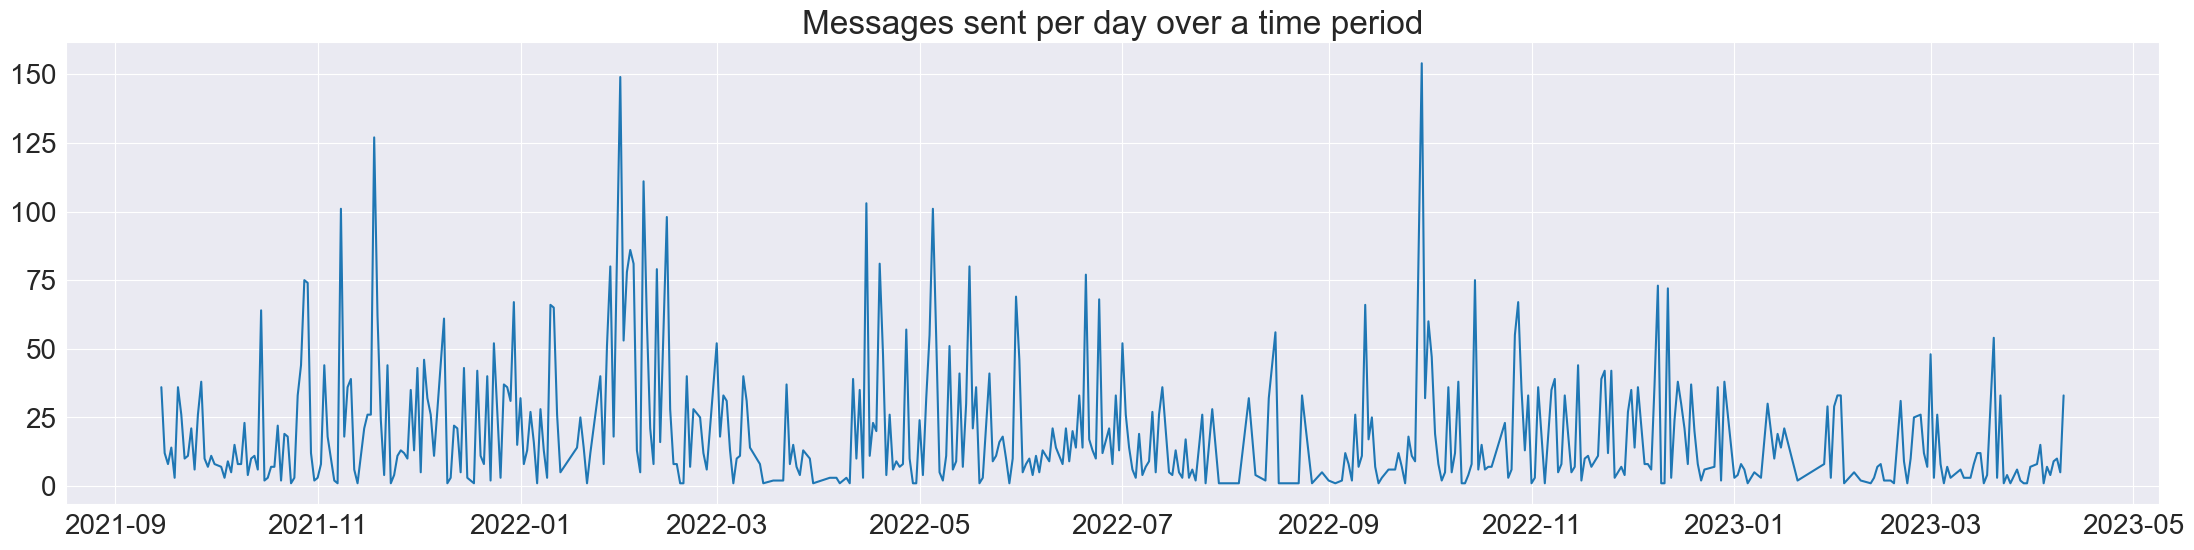

In [10]:
# Improving Default Styles using Seaborn
sns.set_style("darkgrid")

# For better readablity;
import matplotlib
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (27, 6)      # Same as `plt.figure(figsize = (27, 6))`


# A basic plot
plt.plot(df1.date, df1.message_count)
plt.title('Messages sent per day over a time period');

# Could have used Seaborn's lineplot as well.
# sns.lineplot(df1.date, df1.message_count);   


# Saving the plots
plt.savefig('msg_plots.svg', format = 'svg')

In [11]:
top10days = df1.sort_values(by="message_count", ascending=False).head(10)    # Sort values according to the number of messages per day.
top10days.reset_index(inplace=True)           # reset index in order.
top10days.drop(columns="index", inplace=True) # dropping original indices.
top10days

,date,message_count
0,2022-09-29,154
1,2022-01-31,149
2,2021-11-18,127
3,2022-02-07,111
4,2022-04-15,103
5,2021-11-08,101
6,2022-05-05,101
7,2022-02-14,98
8,2022-02-03,86
9,2022-04-19,81


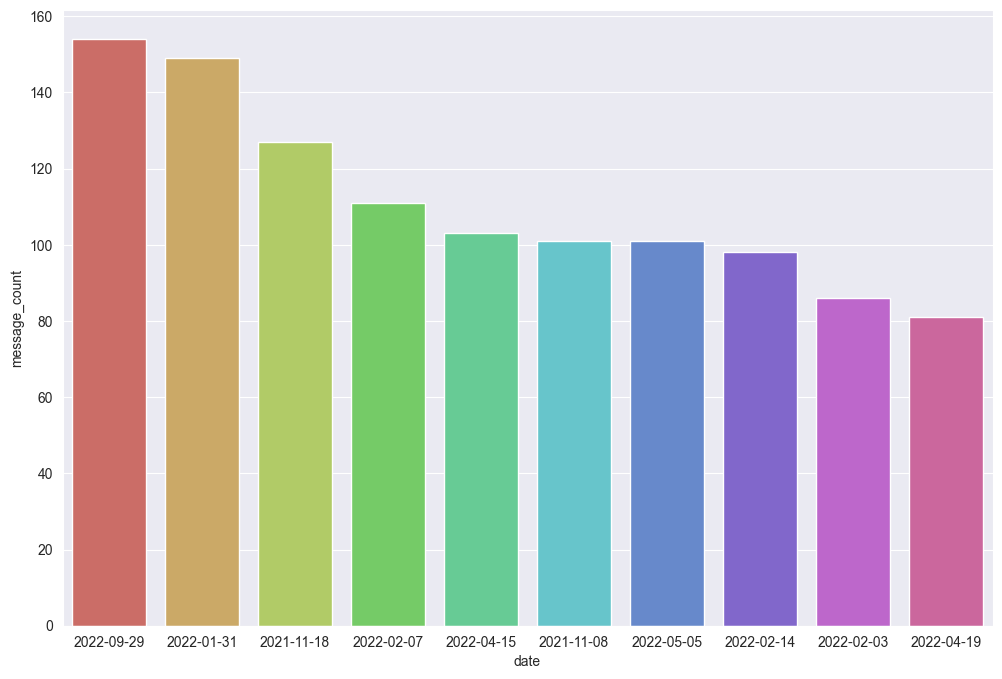

In [12]:
sns.set_style("darkgrid")

# For better readablity;
import matplotlib
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (12, 8)

# A bar plot for top 10 days
sns.barplot(data=df1,x=top10days.date,y= top10days.message_count, palette="hls");

# Saving the plots
plt.savefig('top10_days.svg', format = 'svg')

In [13]:
print(f"Total number of people who have sent at least one message on the group are {len(df.user.unique()) - 1}")   # `-1` because excluding "group_notficiation"

print(f"Number of people who haven't sent even a single message on the group are {64 - len(df.user.unique()) - 1}")

Total number of people who have sent at least one message on the group are 61
Number of people who haven't sent even a single message on the group are 1


In [14]:
df2 = df.copy()    
df2 = df2[df2.user != "group_notification"]
top10df = df2.groupby("user")["message"].count().sort_values(ascending=False)

# Final Data Frame
top10df = top10df.head(10).reset_index()
top10df

,user,message
0,+91 88677 02878,2480
1,Aniketh S Rai,711
2,+91 95382 90928,443
3,Ayush Vidyarthi,398
4,Ajay Kundgir,391
5,+91 73385 27643,283
6,+91 6361 648 157,259
7,+91 88673 17281,242
8,+91 73488 38532,232
9,+91 86523 93101,208


In [16]:
top10df['initials'] = ''
for i in range(10):
    top10df.initials[i] = top10df.user[i].split()[0][0] + top10df.user[i].split()[1][0]
    
for i in range(10):
    top10df.initials[i] = chr(ord('A')+i)  # That's me


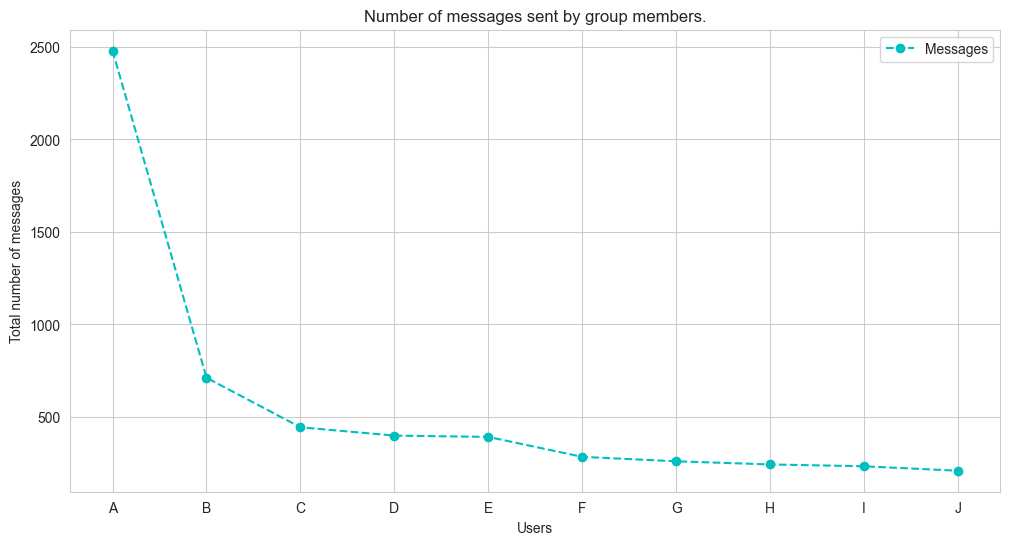

In [17]:
sns.set_style("whitegrid")

# Increasing the figure size
plt.figure(figsize=(12, 6))


# plt.plot(top10df.initials, top10df.message, marker='o', ls='--', c='cyan')

# BETTER IMPLEMENTATION using the `fmt` argument;
plt.plot(top10df.initials, top10df.message, 'o--c')  


# Labels and Title 
plt.xlabel('Users')
plt.ylabel('Total number of messages')

plt.title("Number of messages sent by group members.")
plt.legend(['Messages']);

# Saving the plots
# plt.savefig('msg_plots.svg', format = 'svg')import matplotlib
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

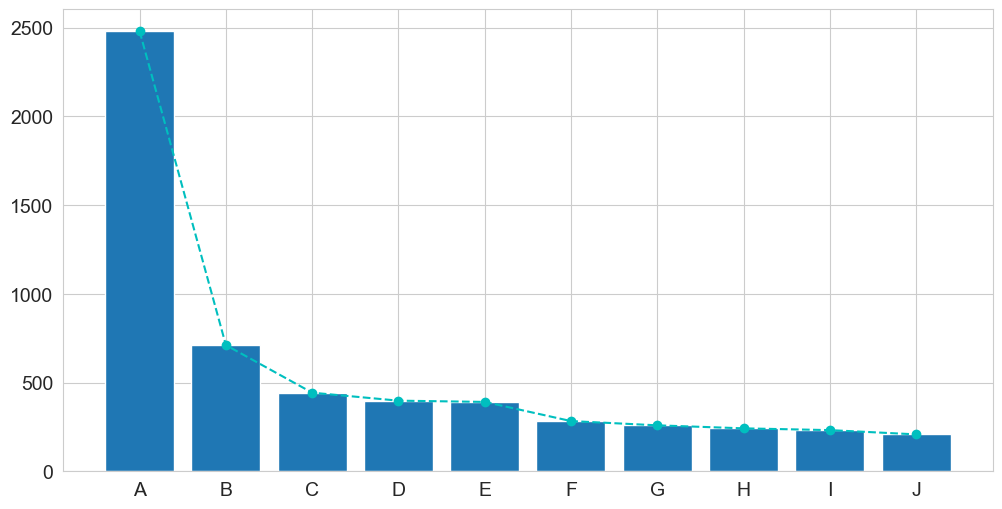

In [18]:
# Improving Default Styles using Seaborn
sns.set_style("whitegrid")

# Increasing the figure size
plt.figure(figsize=(12, 6))

plt.bar(top10df.initials, top10df.message)   # basic bar chart
plt.plot(top10df.initials, top10df.message, 'o--c');   # line chart

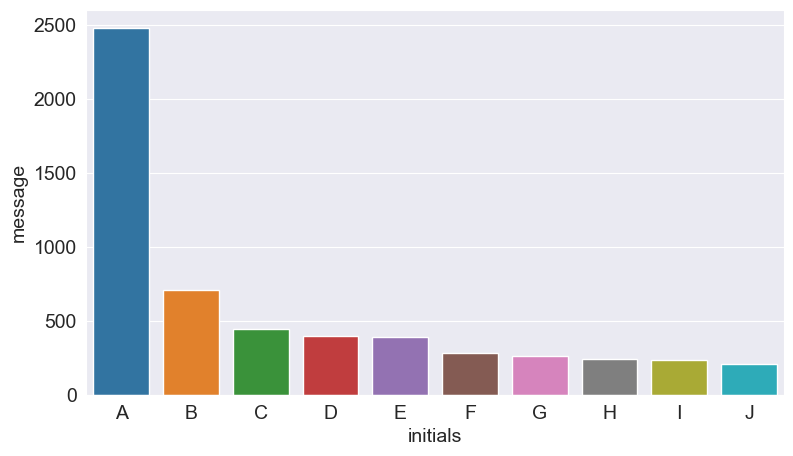

In [19]:
# Beautifying Default Styles using Seaborn
sns.set_style("darkgrid")
sns.barplot(x=top10df.initials, y=top10df.message, data=top10df);

In [20]:

data = df.dropna()
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["message"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["message"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["message"]]
print(data.head())

            date_time                user  \
0 2021-09-15 13:38:00  group_notification   
1 2021-09-15 13:22:00  group_notification   
2 2021-09-15 13:38:00  group_notification   
3 2021-09-15 13:39:00  group_notification   
4 2021-09-15 13:41:00     +91 88677 02878   

                                             message  day month  year  \
0  Messages and calls are end-to-end encrypted. N...  Wed   Sep  2021   
1    +91 88677 02878 created group "CSE A section "   Wed   Sep  2021   
2         You joined using this group's invite link   Wed   Sep  2021   
3  +91 94499 90742 joined using this group's invi...  Wed   Sep  2021   
4  Who reaches first to 5th floor CSE dept , do a...  Wed   Sep  2021   

         date  Positive  Negative  Neutral  
0  2021-09-15     0.000     0.084    0.916  
1  2021-09-15     0.200     0.000    0.800  
2  2021-09-15     0.211     0.000    0.789  
3  2021-09-15     0.167     0.000    0.833  
4  2021-09-15     0.079     0.000    0.921  


In [21]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 
